In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# read Geiger counter data in, skipping bad first few rows, and specifying column labels
# data is the count number, and time of count in ms
df = pd.read_csv("counts.csv",skiprows=29,names=["count", "time_ms"])

In [3]:
t_s = df["time_ms"].to_numpy()/1000
cs = df["count"].to_numpy()
max_t_s = t_s[-1]

In [4]:
# estimate the counting rate:
R = cs[-1] / t_s[-1]
print(f"{R=}")

R=np.float64(1.8737818352412368)


In [5]:
T = 0.5  # time interval for counting, experiment with changing this!
mu = R * T  # expected mean

# break up times into regions in which to figure out counts
bins = np.arange(0,1000,T)
hist, bin_edges = np.histogram(t_s, bins=bins)

# now we have the counts for each of the time intervals
# histogram to check against Poisson distribution
cbins = np.arange(0,11,1)

f_exp, _ = np.histogram(hist, bins=cbins, density=True)
f_theory = [mu**i/math.factorial(i) * np.exp(-mu) for i in cbins[:-1]]

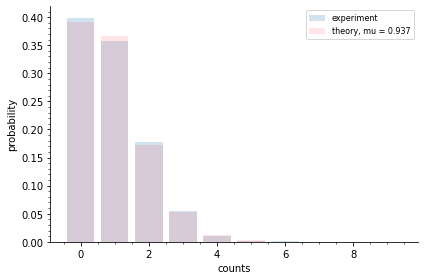

In [6]:
plt.style.use("phys267_jupyter_overhead.mplstyle")
fig, ax = plt.subplots()
ax.bar(cbins[:-1], f_exp, alpha=0.2, label="experiment")
ax.bar(cbins[:-1], f_theory, alpha=0.1, color="red", label=("theory, " +  f"{mu = :.3g}"))
ax = plt.gca()
ax.set_xlabel("counts")
ax.set_ylabel("probability")
ax.legend()
fig.tight_layout()
fig.savefig("counts_analysis_generated.pdf")